In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from text_explorer import TextExplorer
from IPython.display import display

In [11]:
def export_logs(index, source):
    from utils.elasticsearch_utils import ElasticSearchUtils
    
    host_info = {
        'host': 'https://corpus.ncsoft.com:9200',
        'http_auth': 'elastic:nlplab',
    }

    utils = ElasticSearchUtils(**host_info)
    
    query = {
        '_source': source
    }

    doc_list = []
    utils.export(index=index, result=doc_list, query=query)

    df = pd.DataFrame(doc_list).fillna('')

    df.to_json(
        'game_logs/{}.json.bz2'.format(index),
        force_ascii=False,
        compression='bz2',
        orient='records',
        lines=True,
    )

    return df

In [12]:
export_logs(index='corpus-game-chatting-logs', source=['game_name', 'lang', 'post_time', 'text'])

,game_name,text,lang,post_time
0,LM,아큰데 왜여,ko,2019-11-05T12:21:40.940000+09:00
1,LM,네,ko,2019-11-05T12:21:40.940000+09:00
2,LM,너는개다. 멍멍 짖어봐이색꺄,ko,2019-11-05T12:04:11.612000+09:00
3,LM,네,ko,2019-11-05T12:37:43.540000+09:00
4,LM,네,ko,2019-11-05T12:37:43.540000+09:00
...,...,...,...,...
16089765,L2M,개미굴팟 있나요???,ko,
16089766,L2M,팅이신가?,ko,
16089767,L2M,가만히 있다가 파탈하시네,ko,
16089768,L2M,개미굴 팟 구합니다,ko,


In [13]:
export_logs(index='corpus-game-chatting-lineagem', source=['date', 'count', 'text'])

,date,count,text
0,2018-09-20T02:00:07+09:00,1,간만에 법사로좀 놀아볼깡..
1,2018-12-28T01:45:28+09:00,1,야 기던이나 정리좀해봐
2,2018-03-11T02:32:48+09:00,1,아 또 따이 시켜네 몹이 부족해서~~.
3,2018-09-20T02:04:17+09:00,1,머래 빈데 자슥이
4,2018-09-20T02:06:11+09:00,1,너 어디아
...,...,...,...
14025217,2018-02-14T09:14:36+09:00,1,파템 나오긴합니다 혹창 같은거로
14025218,2018-02-14T10:25:11+09:00,1,몽섬들어와ㅋ
14025219,2018-02-14T10:32:27+09:00,1,상자이벤 질러야됨?
14025220,2018-02-14T10:37:40+09:00,1,그기..55~60렙대야죠 겨우 몽섬렙찍음


In [19]:
df = pd.read_json(
    'game_logs/corpus-game-chatting-lineagem.json.bz2',
    compression='bz2',
    orient='records',
    lines=True,
)

df.head()

,date,count,text
0,2018-09-20 02:00:07+09:00,1,간만에 법사로좀 놀아볼깡..
1,2018-12-28 01:45:28+09:00,1,야 기던이나 정리좀해봐
2,2018-03-11 02:32:48+09:00,1,아 또 따이 시켜네 몹이 부족해서~~.
3,2018-09-20 02:04:17+09:00,1,머래 빈데 자슥이
4,2018-09-20 02:06:11+09:00,1,너 어디아


In [21]:
utils = TextExplorer()

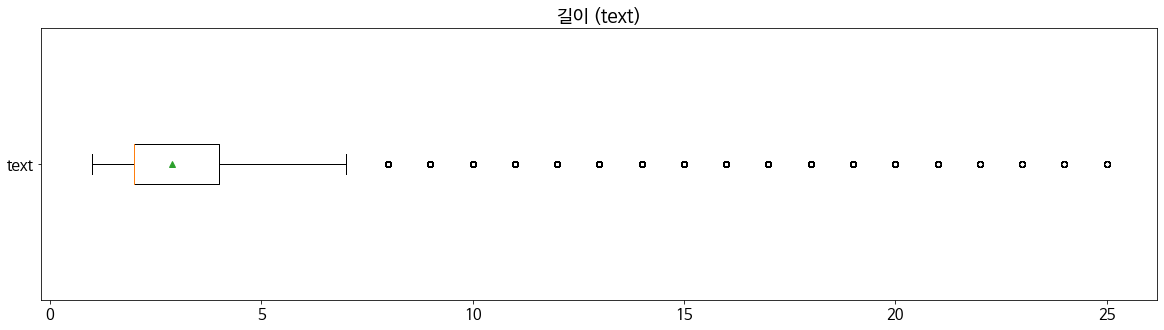

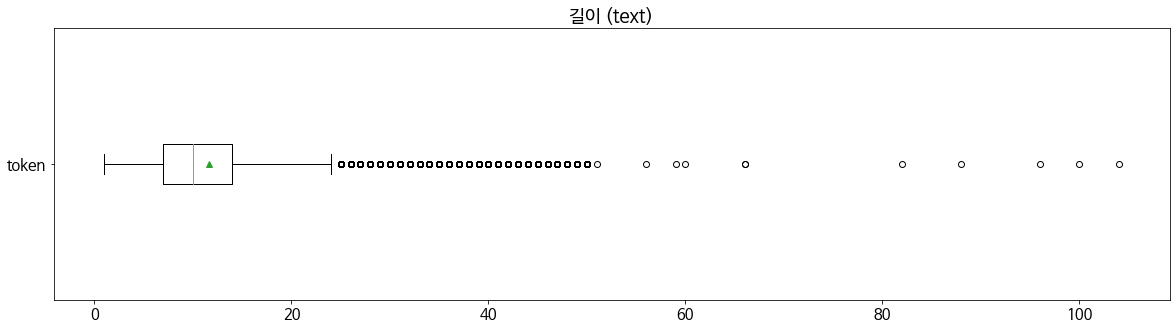

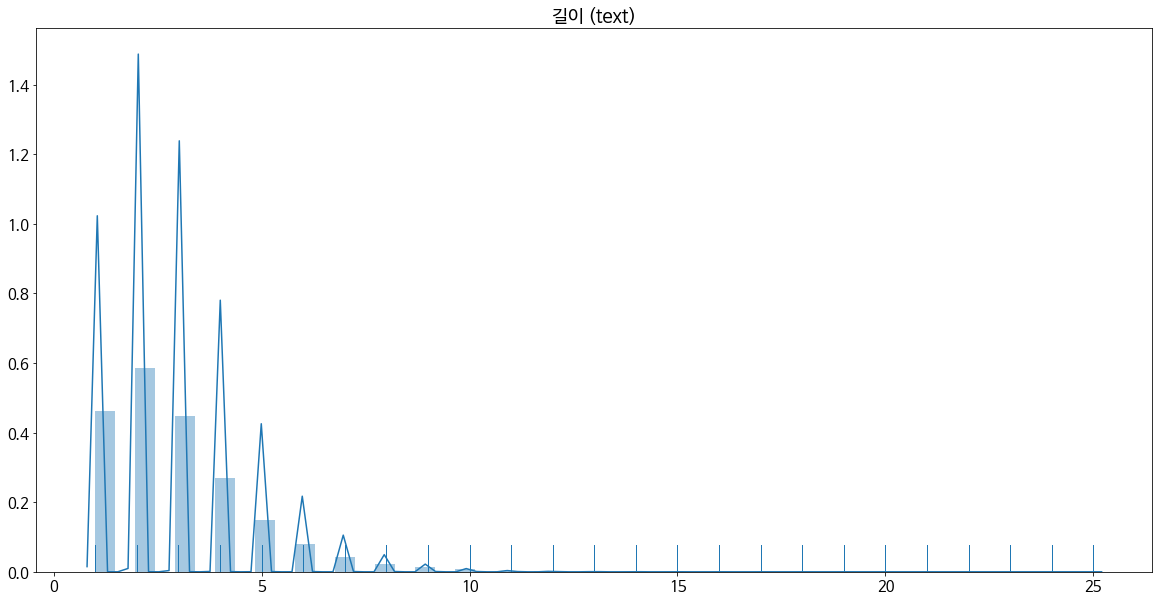

KeyError: 'BLEU'

In [22]:
text_summary = utils.get_summary(df=df, columns=['text'], title='길이')

for k in {'bleu', 'length'}:
    if text_summary[k] is None:
        continue
        
    display(text_summary[k].style.set_caption(k))

In [ ]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('precision', 1)

In [32]:
df['date'].min().date(), df['date'].max().date()

(datetime.date(2018, 1, 2), datetime.date(2019, 3, 6))

In [38]:
rng = pd.period_range(df['date'].min().date(), df['date'].max().date())

rng

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
             '2018-01-10', '2018-01-11',
             ...
             '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
             '2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
             '2019-03-05', '2019-03-06'],
            dtype='period[D]', length=429, freq='D')

In [41]:
df.set_index(rng)

ValueError: Length mismatch: Expected 14025222 rows, received array of length 429